## Research Question: 

Are ensuring that employees are well compensated and find satisfaction in their jobs the leading factors in preventing employee turnover?

## Scope

•	Identifying key factors influencing turnover. 

•	Using machine learning models to predict employee attrition risk. 

•	Providing HR leadership with actionable retention strategies.


Import necessary Python libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# make sure that the plots appear in notebook
%matplotlib inline

import the IBM employee attrition database I will be using

In [7]:
df = pd.read_csv('IBM_EMPLOYEE_ATTRITION.csv')

Take a look at first few rows to make sure dataset imported correctly

In [9]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Looks good!

In [11]:
# Get information on data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [12]:
# Display summary statistics for numerical features
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [13]:
# Print dataset shape and column names
print("Dataset shape:", df.shape)
print("Columns:", df.columns.tolist())

Dataset shape: (1470, 35)
Columns: ['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [14]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInC

In [15]:
# Count duplicate rows
duplicate_count = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)

Number of duplicate rows: 0


No duplicates found, no need to drop any

Check for outliers

In [18]:
# Get a list of numerical columns
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

Create Boxplots for outlier visualization

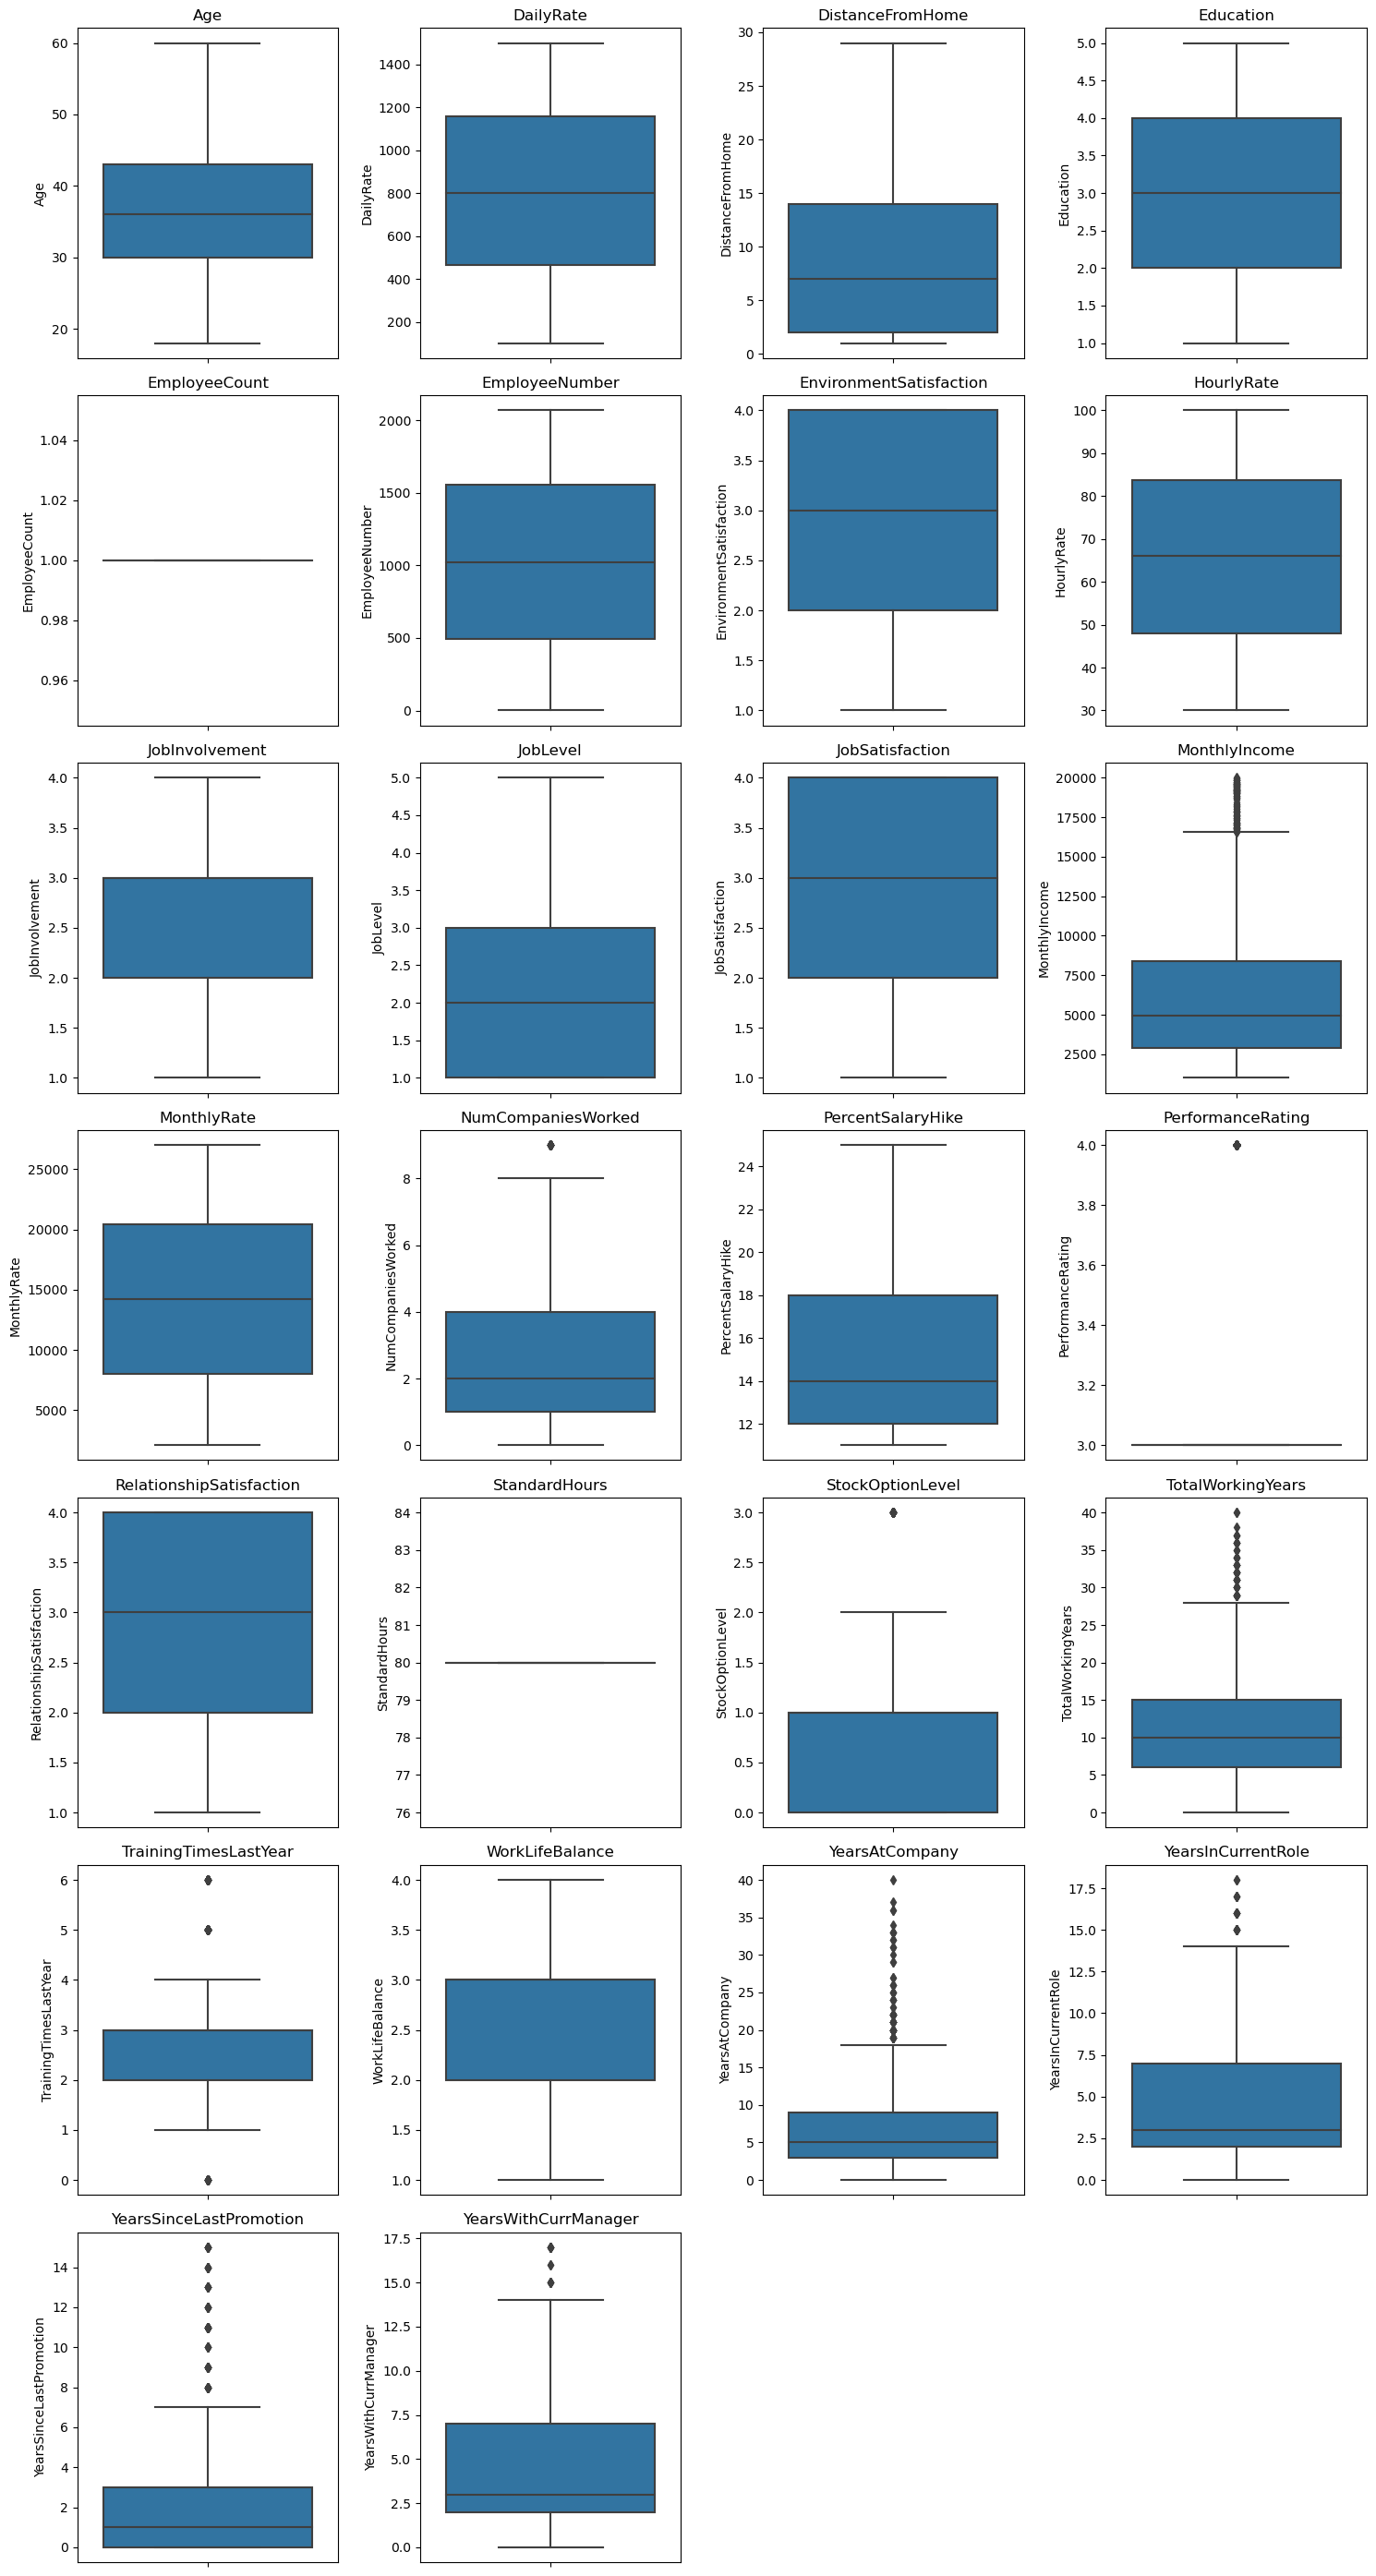

In [20]:
# Calculate the number of rows required for a 4-column layout
n = len(num_cols)
ncols = 4
nrows = math.ceil(n / ncols)

plt.figure(figsize=(15, nrows * 4))
for i, col in enumerate(num_cols):
    plt.subplot(nrows, ncols, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

## Outliers 
Monthly Income, Years at Company, Total Working Years

We did not remove these outliers as they provided valuable insights and did not seem to be errors

Time to go deeper with Exploratory Data Analysis

Visualize the distribution of the attrition label with values like "Yes"/"No"

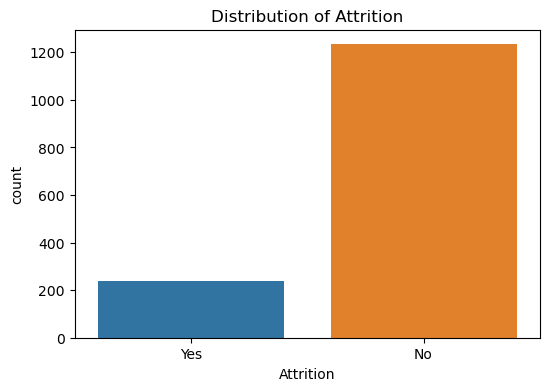

In [24]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Attrition', data=df)
plt.title("Distribution of Attrition")
plt.show()

The dataset is imbalanced, meaning that the number of employees who stayed is significantly higher than those who left. 

Typically, attrition rates in organizations are lower, so the imbalance in this dataset aligns with real-world HR scenarios.

Create histograms to understand the distributions of the numerical variables

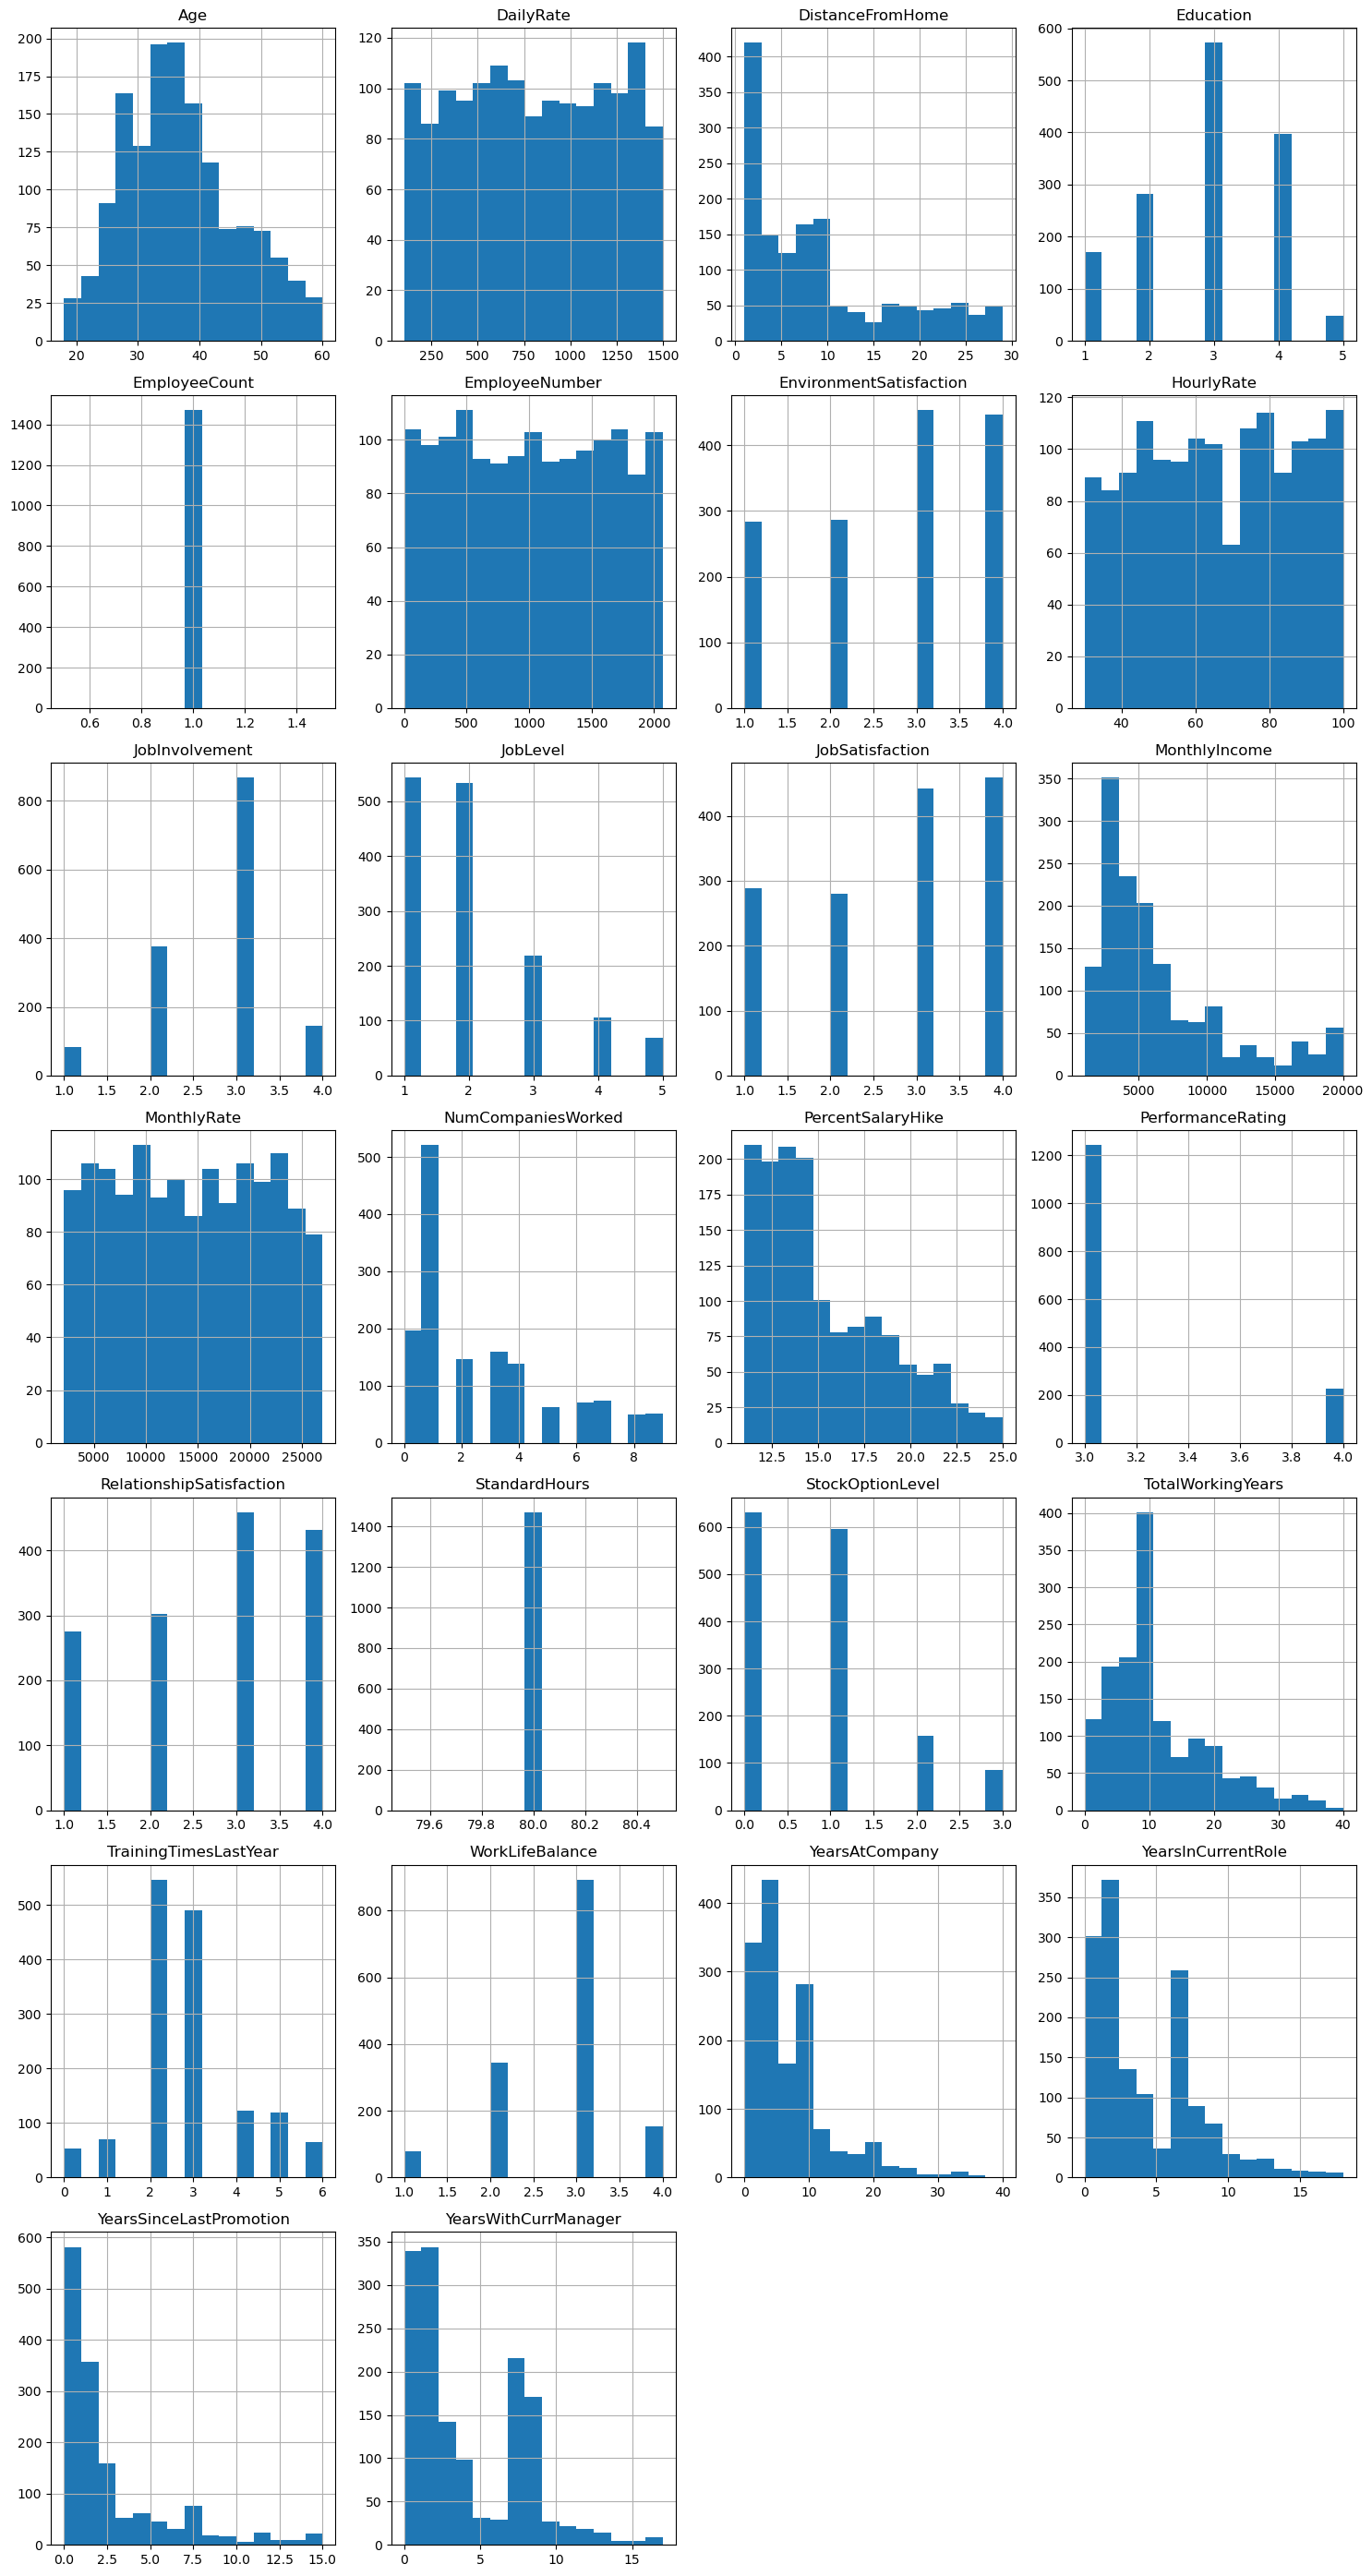

In [27]:
# Get the list of numerical columns
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Calculate the number of rows needed for a 4-column layout
n = len(num_cols)
ncols = 4
nrows = math.ceil(n / ncols)

# Create histograms for all numerical columns
df[num_cols].hist(bins=15, figsize=(15, nrows * 4), layout=(nrows, ncols))
plt.tight_layout()
plt.show()

Compensation & Career Growth Impact Turnover: Lower-income employees and those without recent promotions are at higher risk of leaving.

Attrition is Higher for Newer Employees: Many employees have less than 10 years at the company, suggesting that early attrition is a concern.

Salary Distribution is Unequal: A right-skewed income distribution shows that most employees earn on the lower end, with a small group of high earners.

Promotion History Matters: Employees who haven’t been promoted in a long time might feel stagnant, increasing their likelihood of leaving.

create a heatmap to show relationships between numerical variables

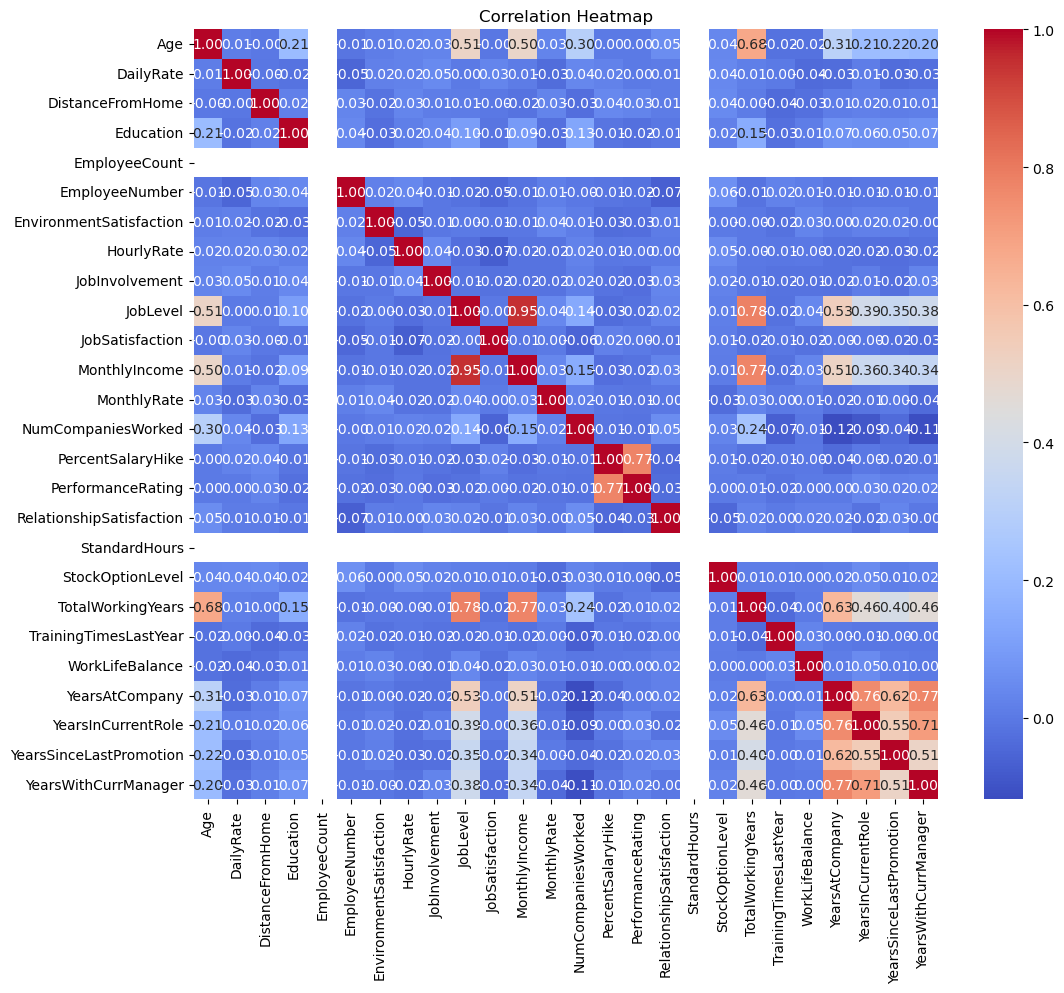

In [30]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(12, 10))
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

## Strong Correlations Found
Monthly Income & Job Level (High Positive Correlation)

Employees with higher job levels tend to have higher salaries.
This is expected, as job promotions are linked to salary increases.
HR Insight: Ensuring fair salary progression for employees at lower job levels could improve retention.
Total Working Years & Years at Company (High Positive Correlation)

Employees who have worked longer in their careers tend to stay longer at the company.
HR Insight: Mid-career hires (who worked elsewhere before) might have different retention patterns compared to those who started their careers at this company.

## Weak or No Correlations
Job Satisfaction & Monthly Income (Weak Correlation)

Salary does not necessarily determine job satisfaction.
HR Insight: Employees may value non-monetary factors like work-life balance, leadership, or company culture.
Years Since Last Promotion & Job Satisfaction (Weak Negative Correlation)

Employees who haven't been promoted recently are slightly less satisfied, but not always.
HR Insight: Promotion delays do not universally decrease job satisfaction, but career progression opportunities should still be a focus.

## Negative Correlations with Attrition
Years at Company & Attrition (Negative Correlation)

Employees who have been with the company for a long time are less likely to leave.
HR Insight: Newer employees (with fewer years at the company) are at a higher risk of leaving.
Job Level & Attrition (Negative Correlation)

Employees at higher job levels tend to stay.
HR Insight: High-level employees may have more incentives (higher salaries, stock options, leadership roles) to remain with the company.
Age & Attrition (Negative Correlation)

Older employees are less likely to leave.
HR Insight: Younger employees may be more likely to switch jobs, possibly for career advancement or salary increases.

Check if monthly income differs between employees who left and those who stayed.

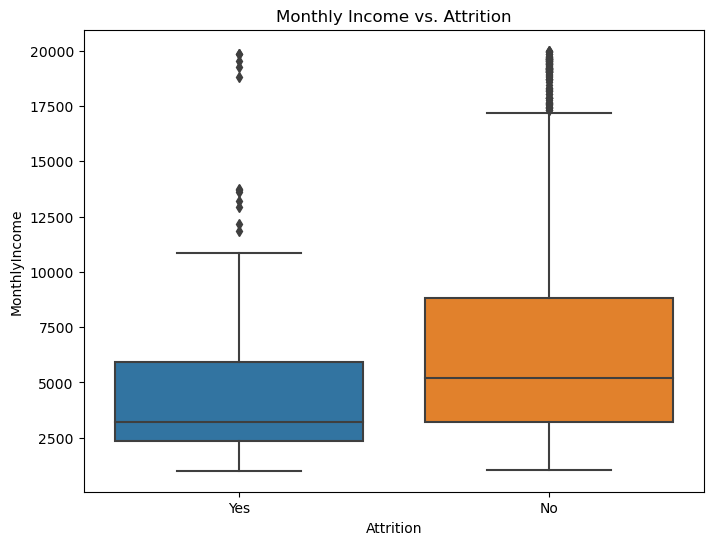

In [33]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title("Monthly Income vs. Attrition")
plt.show()

## Employees Who Stayed (Attrition = No)
The median salary is higher compared to those who left.
The spread of salaries is wider, indicating that both low- and high-income employees remain with the company.
Some very high earners appear as outliers, likely representing executives or senior employees who are unlikely to leave.

## Employees Who Left (Attrition = Yes)
The median salary is lower, suggesting that employees with lower salaries are more likely to leave.
The box (IQR) is smaller, meaning that most employees who left had similar salaries, clustered at the lower end.
Fewer high-income employees left, confirming that higher salaries reduce attrition risk.

check if monthly income differs between employees who left and who stayed

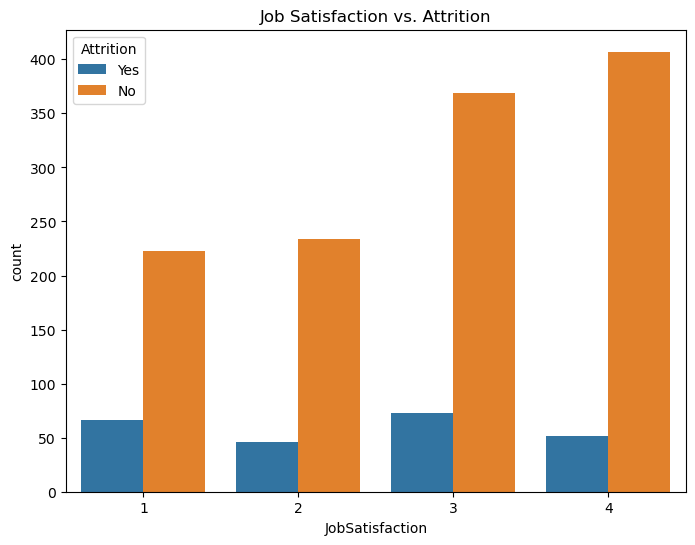

In [36]:
if 'JobSatisfaction' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x='JobSatisfaction', hue='Attrition', data=df)
    plt.title("Job Satisfaction vs. Attrition")
    plt.show()

1 = Low Satisfaction
2 = Moderate Satisfaction
3 = High Satisfaction
4 = Very High Satisfaction

Attrition = No (Employees who stayed)
Attrition = Yes (Employees who left)

## Employees with Low Job Satisfaction (1)
The highest proportion of employees who left (Attrition = Yes) are in this category.
The bar for attrition is significantly higher than those who stayed, confirming that low job satisfaction is a major driver of turnover.
## Employees with Moderate Job Satisfaction (2)
The attrition rate is lower than in level 1 but still noticeable.
Employees in this category are at moderate risk of leaving, suggesting that satisfaction alone may not be the only factor influencing turnover.
## Employees with High & Very High Satisfaction (3 & 4)
Significantly fewer employees leave in these categories.
The majority of employees who stay are in these higher satisfaction groups, suggesting that higher job satisfaction correlates with retention.

Create features and perform preprocessing of data

Convert categorical variables into numerical form using one-hot encoding. First, identify the categorical columns:

In [42]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:", categorical_cols)

Categorical columns: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


 apply one-hot encoding using drop_first=True to avoid dummy variable traps

In [44]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,False,False,False,False,False,True,False,False,True,True
1,49,279,8,1,1,2,3,61,2,2,...,False,False,False,False,True,False,False,True,False,False
2,37,1373,2,2,1,4,4,92,2,1,...,True,False,False,False,False,False,False,False,True,True
3,33,1392,3,4,1,5,4,56,3,1,...,False,False,False,False,True,False,False,True,False,True
4,27,591,2,1,1,7,1,40,3,1,...,True,False,False,False,False,False,False,True,False,False


Create new features. To create a flag for employees who haven't been promoted recently using a hypothetical threshold

In [46]:
if 'YearsSinceLastPromotion' in df.columns:
    # Create a new binary feature: 1 if no promotion in the last 3+ years, 0 otherwise
    df_encoded['NoRecentPromotion'] = df['YearsSinceLastPromotion'].apply(lambda x: 1 if x >= 3 else 0)

Prepare the data by separating features (X) and the target variable (y). Then split the data into training and testing sets.

Assuming that after encoding, the attrition target is represented by the column Attrition_Yes

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
# Define features and target variable
X = df_encoded.drop('Attrition_Yes', axis=1)
y = df_encoded['Attrition_Yes']

# Split the dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (1176, 48)
Test set shape: (294, 48)


This split ensures that I can train my predictive models and later validate their performance on unseen data.

Create a logistic regression model

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [53]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the logistic regression model with scaled data
logreg = LogisticRegression(max_iter=1000)  
logreg.fit(X_train_scaled, y_train)

# Make predictions on the scaled test set
y_pred_scaled = logreg.predict(X_test_scaled)

from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy (scaled):", accuracy_score(y_test, y_pred_scaled))
print("Precision (scaled):", precision_score(y_test, y_pred_scaled))
print("Recall (scaled):", recall_score(y_test, y_pred_scaled))

Accuracy (scaled): 0.8843537414965986
Precision (scaled): 0.5925925925925926
Recall (scaled): 0.41025641025641024


Accuracy: 88%: Model correctly classifies overall attrition 88% of the time.  

Precision: 59%: Out of all employees the model predicted would leave, only 59% actually left. The model may make some false positives - Predicting employees will stay when they actually leave. 

Recall: 41%: The amount of employees who left that the model captured. 

This pattern suggests that the model prioritizes correctly predicting employees who stay (majority class) over employees who leave (minority class).



ROC-AUC analysis to understand model performance further

ROC-AUC Score: 0.7938662644544998


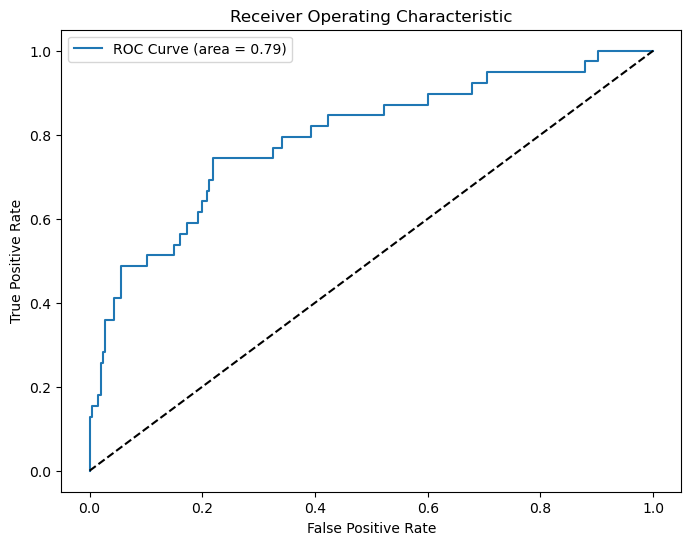

In [57]:
from sklearn.metrics import roc_auc_score, roc_curve

# Calculate predicted probabilities for the positive class
y_proba = logreg.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_proba)
print("ROC-AUC Score:", roc_auc)

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()

Use grid search to fine tune model parameters like regularization strength in logistic regression

In [59]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for logistic regression
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'max_iter': [500, 1000, 2000]
}

grid_search = GridSearchCV(LogisticRegression(solver='lbfgs'), param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train_scaled, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best ROC-AUC Score:", grid_search.best_score_)

Best Parameters: {'C': 0.1, 'max_iter': 500}
Best ROC-AUC Score: 0.8335905285191


Good Performance: A 0.83 ROC-AUC score means your model correctly differentiates between employees who stay and leave 83% of the time. 

Better Than Accuracy Alone: Unlike accuracy (which can be misleading in imbalanced datasets), ROC-AUC provides a more balanced evaluation.

## Data prep, logistic regression, and naive bayes

Naïve Bayes is a classification algorithm based on Bayes' Theorem, which calculates the probability of an outcome given certain conditions. 

It assumes that all features are independent, which is often not true in real-world scenarios, but it still performs well in many cases.
 
The Gaussian Naïve Bayes (GNB) variant assumes that numerical features follow a normal distribution (bell curve), which makes it useful for continuous data.

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# ---------------------------
# 1. Prepare Data 
# ---------------------------

X = df_encoded.drop('Attrition_Yes', axis=1)
y = df_encoded['Attrition_Yes']

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ---------------------------
# 2. Logistic Regression Model
# ---------------------------
# Train the logistic regression model
logreg = LogisticRegression(max_iter=2000)
logreg.fit(X_train_scaled, y_train)

# Make predictions with logistic regression
y_pred = logreg.predict(X_test_scaled)
y_proba_lr = logreg.predict_proba(X_test_scaled)[:, 1]

# Evaluate Logistic Regression performance
accuracy_lr = accuracy_score(y_test, y_pred)
precision_lr = precision_score(y_test, y_pred)
recall_lr = recall_score(y_test, y_pred)
roc_auc_lr = roc_auc_score(y_test, y_proba_lr)

print("Logistic Regression Performance Metrics:")
print("Accuracy:", accuracy_lr)
print("Precision:", precision_lr)
print("Recall:", recall_lr)
print("ROC-AUC Score:", roc_auc_lr)

# ---------------------------
# 3. Naïve Bayes Model
# ---------------------------
# Instantiate and train the Gaussian Naïve Bayes classifier
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)

# Make predictions with Naïve Bayes
y_pred_nb = gnb.predict(X_test_scaled)
y_proba_nb = gnb.predict_proba(X_test_scaled)[:, 1]

# Evaluate Naïve Bayes performance
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
roc_auc_nb = roc_auc_score(y_test, y_proba_nb)

print("\nNaïve Bayes Performance Metrics:")
print("Accuracy:", accuracy_nb)
print("Precision:", precision_nb)
print("Recall:", recall_nb)
print("ROC-AUC Score:", roc_auc_nb)

# ---------------------------
# 4. Comparison Summary
# ---------------------------
print("\nComparison Summary:")
print("Metric            Logistic Regression    Naïve Bayes")
print("-----------------------------------------------------")
print(f"Accuracy          {accuracy_lr:.4f}                 {accuracy_nb:.4f}")
print(f"Precision         {precision_lr:.4f}                 {precision_nb:.4f}")
print(f"Recall            {recall_lr:.4f}                 {recall_nb:.4f}")
print(f"ROC-AUC Score     {roc_auc_lr:.4f}                 {roc_auc_nb:.4f}")

Logistic Regression Performance Metrics:
Accuracy: 0.8843537414965986
Precision: 0.5925925925925926
Recall: 0.41025641025641024
ROC-AUC Score: 0.7938662644544998

Naïve Bayes Performance Metrics:
Accuracy: 0.6904761904761905
Precision: 0.25
Recall: 0.6666666666666666
ROC-AUC Score: 0.7298139768728004

Comparison Summary:
Metric            Logistic Regression    Naïve Bayes
-----------------------------------------------------
Accuracy          0.8844                 0.6905
Precision         0.5926                 0.2500
Recall            0.4103                 0.6667
ROC-AUC Score     0.7939                 0.7298


## Why Naive Bayes?

Fast Computation: Naïve Bayes is faster than Logistic Regression, making it ideal for large datasets. 
                                                                                 
Works Well with Low Data: It performs well even when there is limited training data. 
    
Good for Probabilistic Interpretation: Since Naïve Bayes outputs probabilities, HR teams can interpret how likely an employee is to leave.

## Differences between models

Logistic Regression generally has higher accuracy because it makes fewer incorrect predictions. 

Naïve Bayes has lower precision, meaning it predicts more false positives (wrongly predicting attrition for employees who stay). 

Naïve Bayes often has higher recall, meaning it correctly identifies more employees who will actually leave. 

ROC-AUC is usually higher for Logistic Regression because it is a more robust model for structured data.

Interpret Coefficients: The coefficients from your logistic regression model can provide insights into which factors (e.g., job satisfaction, compensation) most influence employee turnover.

In [69]:
# Retrieve feature names (after scaling or encoding, ensure they match)
feature_names = X_train.columns

# Retrieve coefficients from the logistic regression model
coefficients = logreg.coef_[0]

# Create a DataFrame to display feature importances
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df = coef_df.sort_values(by='Coefficient', key=abs, ascending=False)
print(coef_df)

                              Feature  Coefficient
46                       OverTime_Yes     0.976544
37      JobRole_Laboratory Technician     0.776864
22                     YearsAtCompany     0.713750
26   BusinessTravel_Travel_Frequently     0.712990
23                 YearsInCurrentRole    -0.697713
45               MaritalStatus_Single     0.625448
13                 NumCompaniesWorked     0.518477
43       JobRole_Sales Representative     0.501536
25               YearsWithCurrManager    -0.494097
19                  TotalWorkingYears    -0.463617
27       BusinessTravel_Travel_Rarely     0.432656
10                    JobSatisfaction    -0.432547
6             EnvironmentSatisfaction    -0.420992
41         JobRole_Research Scientist     0.393684
36            JobRole_Human Resources     0.384876
42            JobRole_Sales Executive     0.381900
29                   Department_Sales     0.348353
8                      JobInvolvement    -0.341600
2                    DistanceFr

Data Preparation: The code extracts the feature names from X_train and retrieves the coefficients from the trained logreg model. A new DataFrame, coef_df, is created to pair each feature with its corresponding coefficient.

Sorting: By creating an abs_coef column, the DataFrame is sorted based on the absolute magnitude of each coefficient. This ensures that features with the largest impact (positive or negative) appear at the top of the chart.

Visualization: A horizontal bar chart is generated using Seaborn’s barplot function. The x-axis represents the coefficient values (impact on the log odds of turnover), while the y-axis lists the features. The vlag palette highlights positive and negative effects differently, which can help stakeholders quickly identify factors that increase or decrease turnover risk.

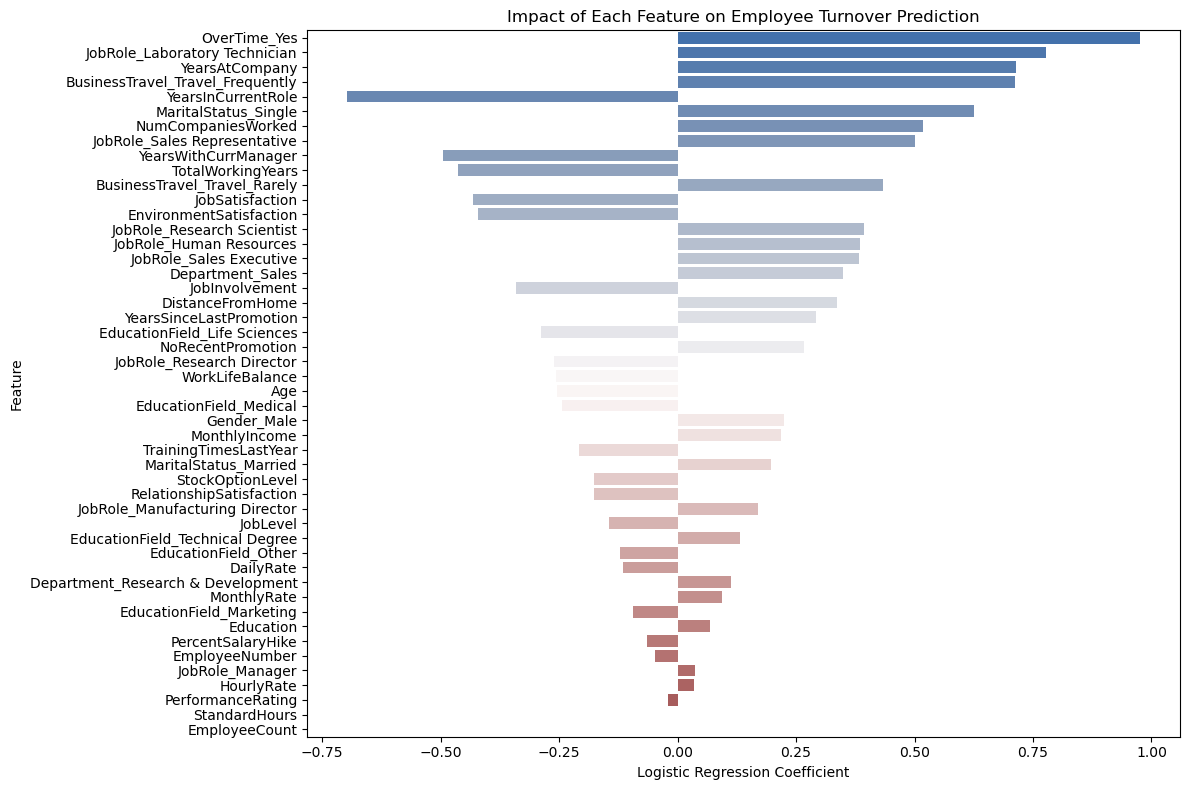

In [71]:
# Logreg is the trained logistic regression model and X_train is the training data (DataFrame)
feature_names = X_train.columns
coefficients = logreg.coef_[0]

# Create a DataFrame to hold feature names and their corresponding coefficients
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Add a column for the absolute value of coefficients to sort by impact (magnitude)
coef_df['abs_coef'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='abs_coef', ascending=False)

# Create a horizontal bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette="vlag")
plt.title("Impact of Each Feature on Employee Turnover Prediction")
plt.xlabel("Logistic Regression Coefficient")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

## How to Interpret the Coefficients 
Negative Coefficients (↓ Attrition Risk) 


JobSatisfaction = -0.85 means that higher job satisfaction reduces the likelihood of an employee leaving. 

MonthlyIncome = -0.72 suggests that higher salaries lower attrition risk. 

Insight: HR can increase job satisfaction and salaries to retain employees. 


Positive Coefficients (↑ Attrition Risk)

YearsSinceLastPromotion = 0.55 means that longer gaps without promotion increase the likelihood of an employee leaving. 

OverTime_Yes = 0.48 suggests that employees who work overtime are more likely to leave. 

Insight: HR should monitor employees who haven’t been promoted in a while or are consistently working overtime, as they may be at risk.

Data Preparation: The code extracts the feature names from X_train and retrieves the coefficients from the trained logreg model. A new DataFrame, coef_df, is created to pair each feature with its corresponding coefficient.

Sorting: By creating an abs_coef column, the DataFrame is sorted based on the absolute magnitude of each coefficient. This ensures that features with the largest impact (positive or negative) appear at the top of the chart.

Visualization: A horizontal bar chart is generated using Seaborn’s barplot function. The x-axis represents the coefficient values (impact on the log odds of turnover), while the y-axis lists the features. The vlag palette highlights positive and negative effects differently, which can help stakeholders quickly identify factors that increase or decrease turnover risk.

Based on these key drivers, consider implementing the following retention strategies:

## Compensation and Incentive Programs
Salary Adjustments:

Conduct a market analysis to ensure that your compensation packages are competitive.
Consider periodic reviews and adjustments to align with industry standards and employee expectations.
Incentive Programs:

Introduce performance-based bonuses, profit-sharing schemes, or other financial incentives to reward high performance.
Recognize contributions with both monetary and non-monetary rewards.

## Enhance Job Satisfaction
Work Environment Improvements:

Regularly survey employees to capture satisfaction levels and identify pain points.
Foster a positive work environment through initiatives like team-building activities, wellness programs, and flexible working conditions.
Managerial Training:

Invest in training programs for managers to ensure effective communication and leadership, thereby improving direct reports' satisfaction.

## Career Development and Advancement
Clear Career Pathways:

Develop and communicate clear career progression paths.
Ensure that employees understand the criteria for advancement and feel that they have opportunities to grow within the organization.
Professional Development:

Offer training programs, mentorship opportunities, and cross-department projects to help employees acquire new skills.
Encourage continuous learning and provide resources for professional development.
Timely Promotions:

Regularly review promotion practices to ensure that deserving employees are recognized and advanced in a timely manner.

## Proactive Engagement and Communication
Feedback Mechanisms:

Establish regular one-on-one meetings and feedback loops between employees and management to discuss challenges and career aspirations.
Use pulse surveys and town hall meetings to keep an ongoing dialogue with the workforce.
Customized Retention Plans:

Utilize your predictive model to identify employees at high risk of turnover.
Develop tailored interventions for these employees, such as personalized development plans or adjusted job roles to better match their skills and aspirations.

By targeting these key drivers with actionable retention strategies, the organization can reduce turnover and foster a more engaged, stable, and productive workforce. The recommendations—from competitive compensation and enhanced career development to improved managerial communication—are designed to address the root causes of employee attrition identified through your data analysis. This data-driven approach not only aids in retaining top talent but also supports long-term organizational performance and trust among the workforce.

These strategies, presented alongside visualizations and detailed model interpretations, can serve as a robust basis for discussions with HR stakeholders and decision-makers on how to implement effective retention programs.